# Маслов АН

## 1. Вычислить скользящее среднее за указанный период (входные данные), визуализировать результат, построить граф вычислений. Сделать 2-3 варианта вычсилений, используя разные параметры и их значения

In [57]:
import dask.dataframe as dd 
import matplotlib.pyplot as plt
import pandas as pd

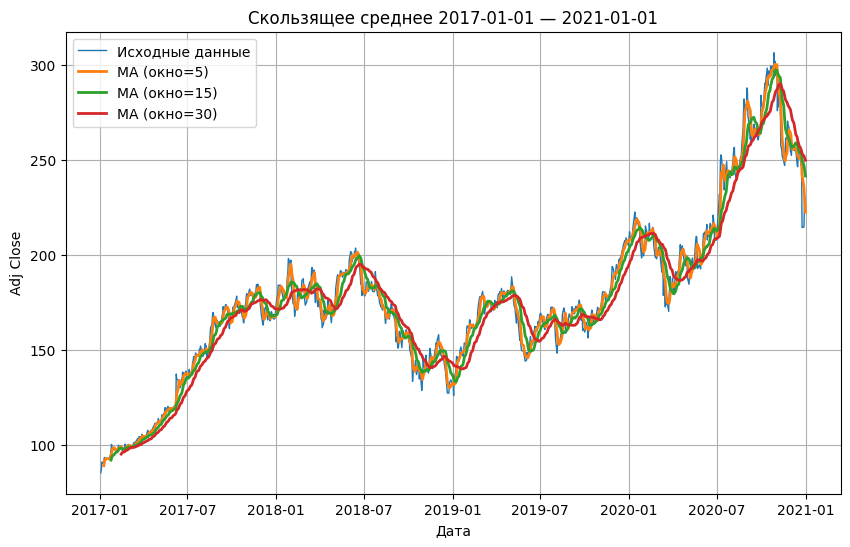

In [58]:
fin_data = dd.read_csv('Ali_Baba_Stock_Data.csv', parse_dates=['Date'])
result = fin_data.compute()
result = result.sort_values('Date')
result.set_index('Date', inplace=True)

# Выбор дат
start_date = '2017-01-01'
end_date = '2021-01-01'
result = result.loc[start_date:end_date]

# Вычисление скользящего среднего 
result['MA_5'] = result['Adj Close'].rolling(window=5).mean()     # короткое окно
result['MA_15'] = result['Adj Close'].rolling(window=15).mean()   # среднее окно
result['MA_30'] = result['Adj Close'].rolling(window=30).mean()   # длинное окно

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(result.index, result['Adj Close'], label='Исходные данные', linewidth=1)
plt.plot(result.index, result['MA_5'], label='MA (окно=5)', linewidth=2)
plt.plot(result.index, result['MA_15'], label='MA (окно=15)', linewidth=2)
plt.plot(result.index, result['MA_30'], label='MA (окно=30)', linewidth=2)

plt.title(f'Скользящее среднее {start_date} — {end_date}')
plt.xlabel('Дата')
plt.ylabel('Adj Close')
plt.legend()
plt.grid(True)
plt.show()

## 2. Определить, в каком месяце указанного периода была 
### наименьшая разница между значениями Open и Close
### наибольшая разница между значениями Max и Мin
### наибольший объем месячных продаж 
### наибольшее значение Max


In [59]:
import dask.dataframe as dd
fin_data = dd.read_csv('TESLA_stock.csv', parse_dates=['Date'])
fin_data = fin_data.set_index('Date', sorted=True)

# Преобразуем к месячному периоду
monthly = fin_data.resample('M').agg({
    'Open': 'mean',
    'Close': 'mean',
    'High': 'max',
    'Low': 'min',
    'Volume': 'sum'
})

#Добавляем расчётные колонки
monthly['Diff_Open_Close'] = (monthly['Open'] - monthly['Close']).abs()
monthly['Diff_High_Low'] = (monthly['High'] - monthly['Low']).abs()
monthly_fin_data = monthly.compute()

# Ищем нужные месяцы
min_diff_open_close = monthly_fin_data['Diff_Open_Close'].idxmin()
max_diff_high_low = monthly_fin_data['Diff_High_Low'].idxmax()
max_volume_month = monthly_fin_data['Volume'].idxmax()
max_value_month = monthly_fin_data['High'].idxmax()

print("Месяц с минимальной разницей (Open-Close):", min_diff_open_close.strftime("%Y-%m"))
print("Месяц с максимальной разницей (High-Low):", max_diff_high_low.strftime("%Y-%m"))
print("Месяц с наибольшим объёмом продаж:", max_volume_month.strftime("%Y-%m"))
print("Месяц с наибольшим значением High:", max_value_month.strftime("%Y-%m"))


c:\Users\alexm\AppData\Local\Programs\Python\Python313\Lib\site-packages\dask\dataframe\io\csv.py:594: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


Месяц с минимальной разницей (Open-Close): 2010-10
Месяц с максимальной разницей (High-Low): 2022-01
Месяц с наибольшим объёмом продаж: 2020-02
Месяц с наибольшим значением High: 2021-11
